**This notebook is for training a custom yolo-lite model**


For simplicity the scripts accepts yolov8 structured datasets directly from Roboflow.
1. Make sure you connect to a GPU
2. clone the repository and install all dependencies


In [ ]:
!nvidia-smi

Mon Oct 20 18:28:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!git clone https://github.com/Lillthorin/YoloLite-Official-Repo
%cd YoloLite-Official-Repo
!pip install -r requirements.txt

Cloning into 'YoloLite-Official-Repo'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 375 (delta 49), reused 0 (delta 0), pack-reused 269 (from 1)
Receiving objects: 100% (375/375), 256.34 KiB | 6.93 MiB/s, done.
Resolving deltas: 100% (188/188), done.
/content/YoloLite-Official-Repo




**In this case we are trying to replicate the benchmark for edgde_s on the dataset chess_piece dataset from roboflow 100**

Observe that the BENCHMARK.md numbers was created with epochs == 200. To allow user without PRO epochs has been set to 100, you might see a decrease in some numbers due to the change.
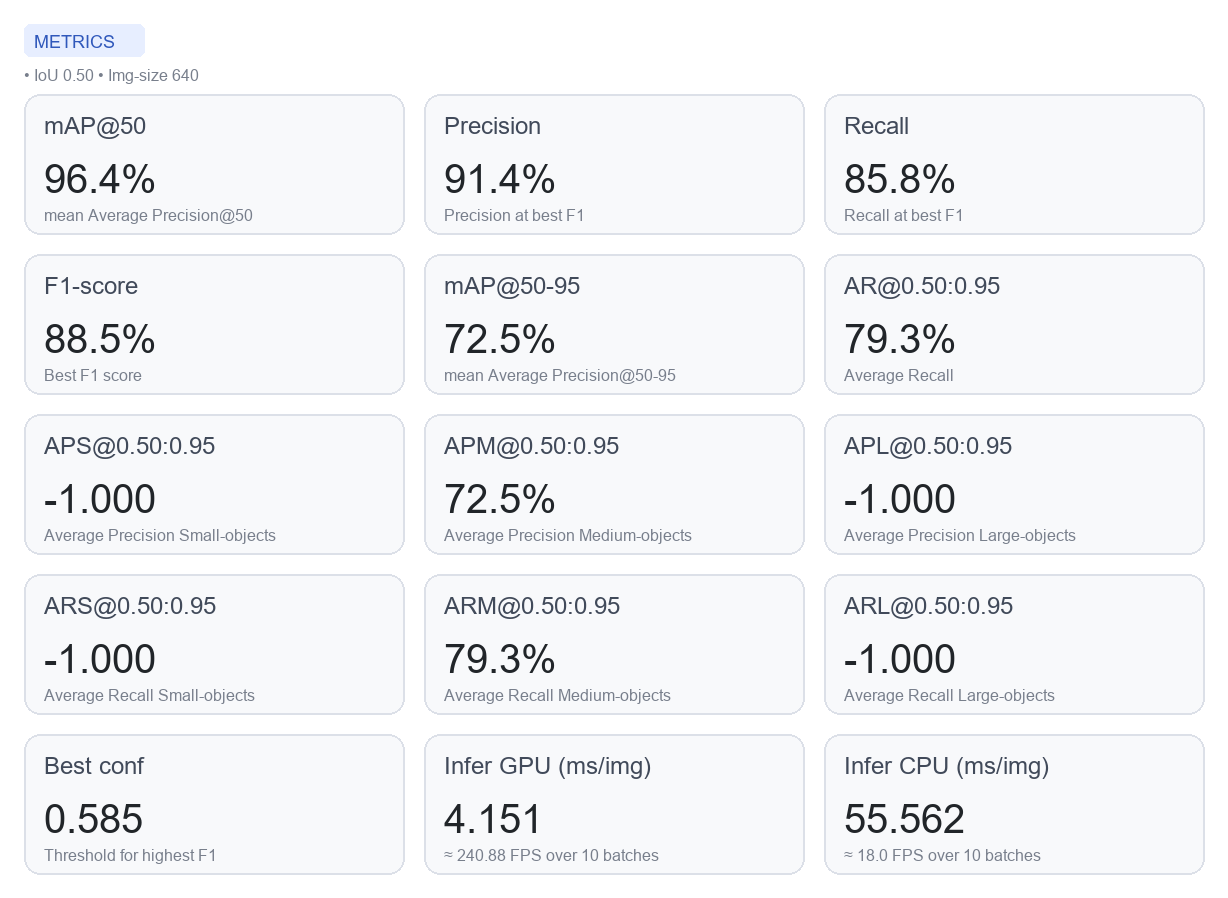
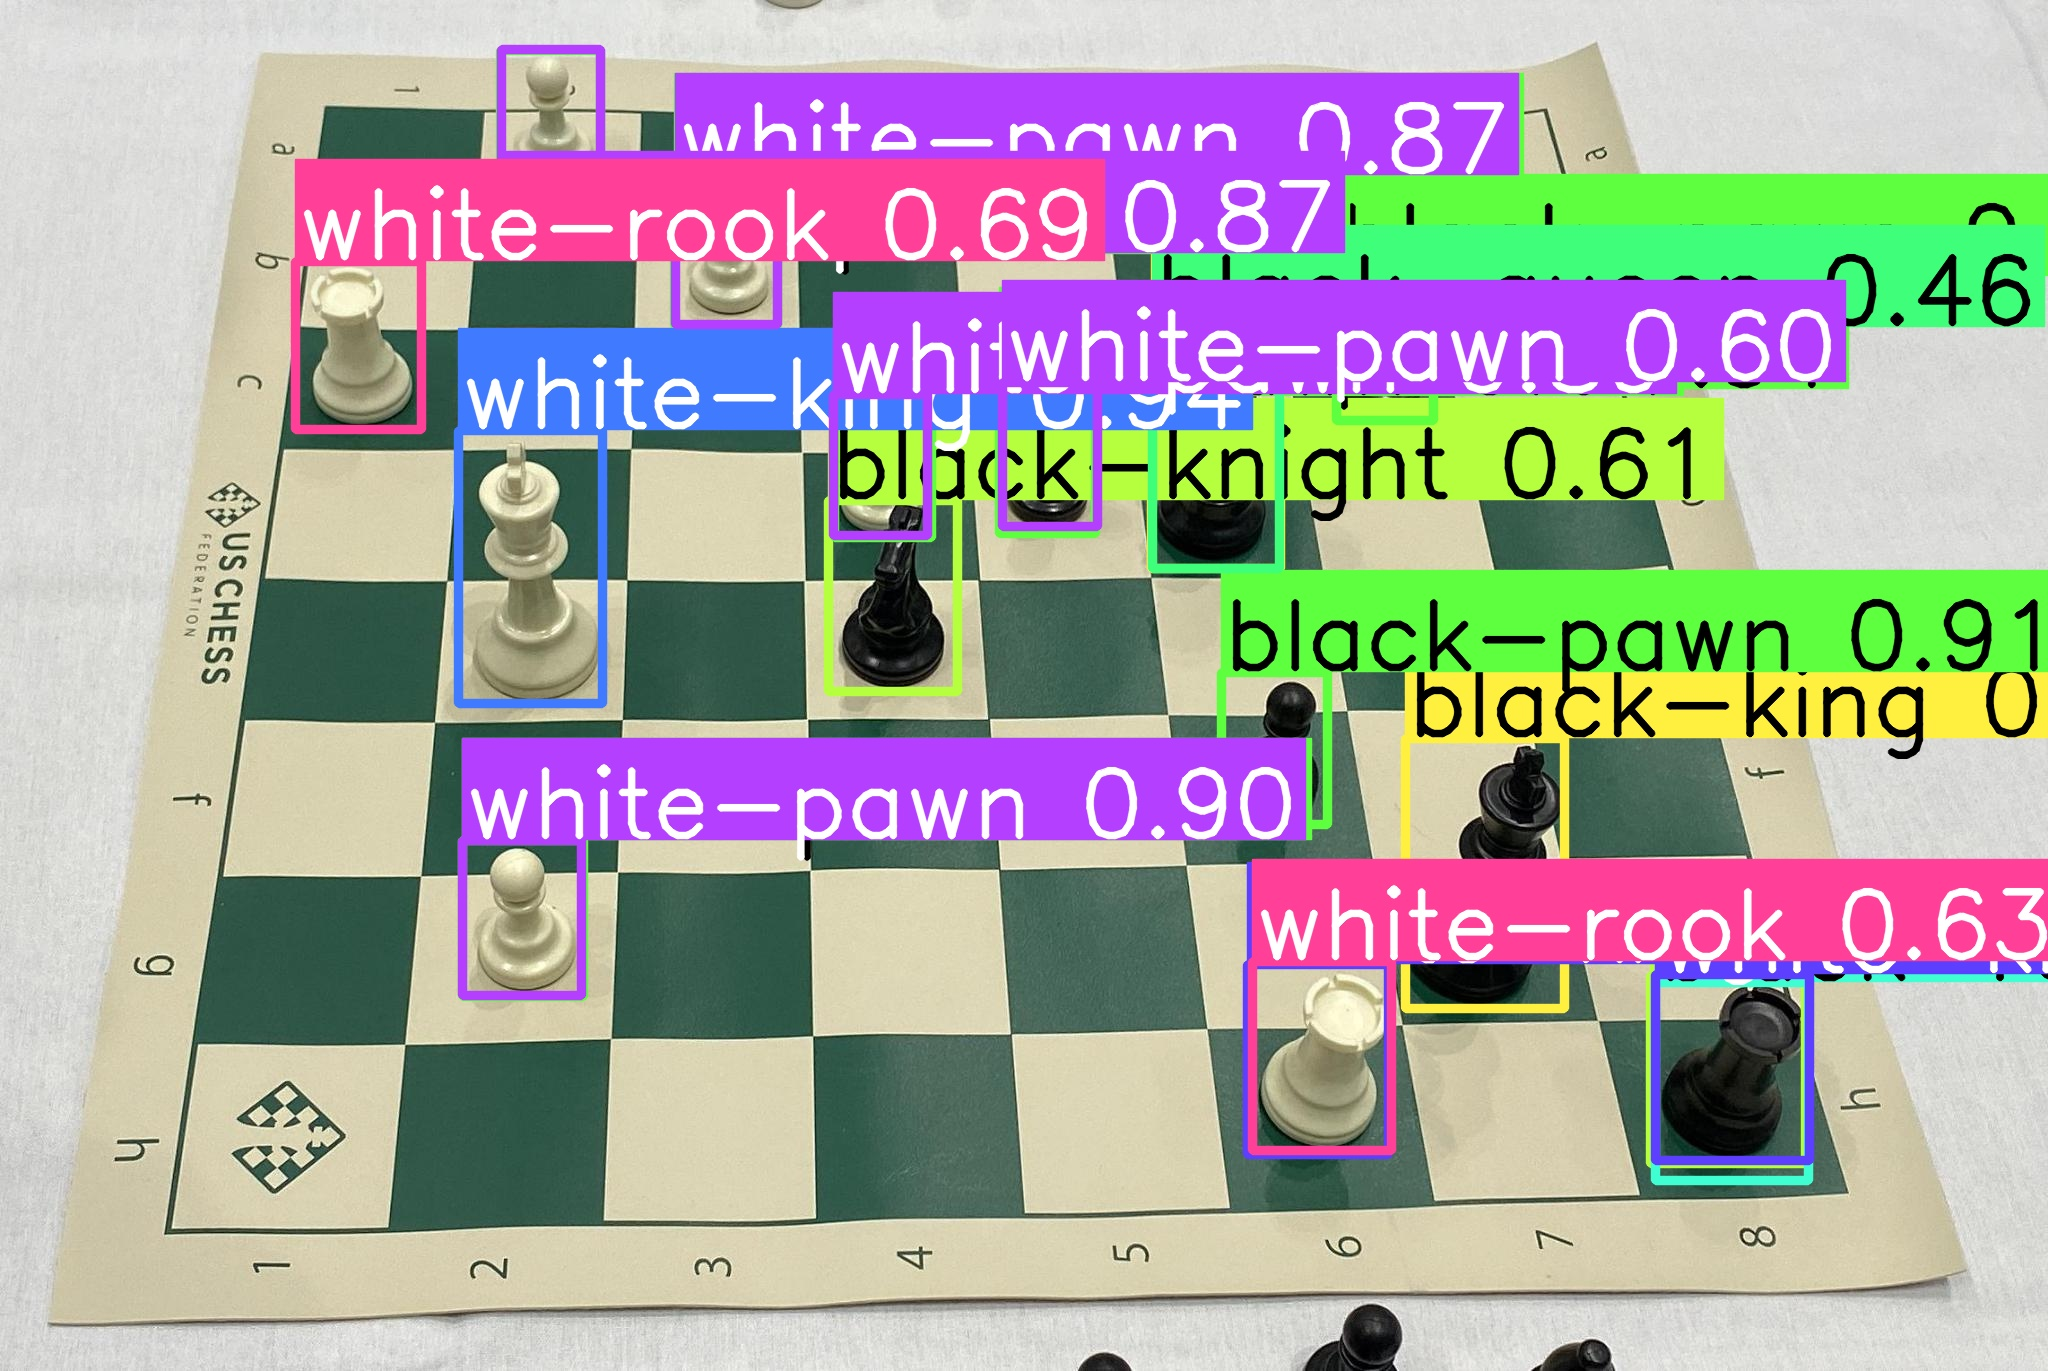



# Download the dataset from Roboflow

Make sure to use yolov8 version, you can simply change the api key in the script below to download the dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Your-api-key")
project = rf.workspace("roboflow-100").project("chess-pieces-mjzgj")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to chess-pieces-2 in yolov8:: 100%|██████████| 590/590 [00:00<00:00, 2538.95it/s]


# Training



*Default training args*

* --model, type=str, required=True, help="Path to model.yaml"
* --train, default="configs/train/standard_train.yaml", type=str, required=False, help="Path to train.yaml"
* --data,   type=str, required=True, help="Path to data.yaml"
* --epochs, type=int, default=200
* --batch_size, type=int, default=16
* --device, type=str, default=0  "0", "cpu"
* --img_size, type=int, default=640
* --workers, type=int, default=4
* --augment, default=True, action=argparse.BooleanOptionalAction --no--augment
* --use_p6,  default=False, action=argparse.BooleanOptionalAction  
* --resume, type=str, default=None, help="Resume training from last checkpoint if available"
* --lr, type=float, default=None, help="Override learning rate if set"
* --save_every", type=int, default=25, help="Save every x epoch"

**Available models**
  

---


  
*   configs/models/edge_n.yaml  - *CPU architecture*
*   configs/models/edge_s.yaml  - *CPU architecture*
*   configs/models/edge_m.yaml  - *CPU architecture*
* configs/models/edge_l.yaml  - *CPU architecture*
* configs/models/yololite_n.yaml
* configs/models/yololite_s.yaml
* configs/models/yololite_m.yaml
*  configs/models/yololite_l.yaml
*  configs/models/yololite_xl.yaml

*New heavier on cpu*
*  configs/v2_models/yololite_n.yaml
* configs/v2_models/yololite_s.yaml
 * configs/v2_models/yololite_m.yaml
  * configs/v2_models/yololite_l.yaml
  * configs/v2_models/yololite_xl.yaml

In [ ]:
!python tools/train.py --model configs/models/edge_s.yaml --data {dataset.location}/data.yaml --epochs 100 --img_size 640 --batch_size 8 --workers 4

/content/YoloLite-Official-Repo/scripts/data/augment.py:14: UserWarning: Argument(s) 'cval' are not valid for transform Affine
  return A.Affine(
/content/YoloLite-Official-Repo/scripts/data/augment.py:42: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  return A.GaussNoise(var_limit=(5.0, 20.0), p=p)
/content/YoloLite-Official-Repo/scripts/data/augment.py:27: UserWarning: Argument(s) 'value' are not valid for transform PadIfNeeded
  return A.PadIfNeeded(
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
model.safetensors: 100% 15.2M/15.2M [00:00<00:00, 27.2MB

# Display plots

Change the f-string in the code cell underneath to change what plot to check
```
f'{HOME}/runs/train/1/loss_curve.png'
f'{HOME}/runs/train/1/summary.png'
f'{HOME}/runs/train/1/P_curve.png'
f'{HOME}/runs/train/1/R_curve.png'
f'{HOME}/runs/train/1/plots/metrics_overview.png'
f'{HOME}/runs/train/1/plots/AP.png'
f'{HOME}/runs/train/1/plots/AP50.png'
f'{HOME}/runs/train/1/plots/AP75.png'
f'{HOME}/runs/train/1/plots/APL.png'
f'{HOME}/runs/train/1/plots/APM.png'
f'{HOME}/runs/train/1/plots/APS.png'
f'{HOME}/runs/train/1/plots/AR.png'
```



/content/YoloLite-Official-Repo


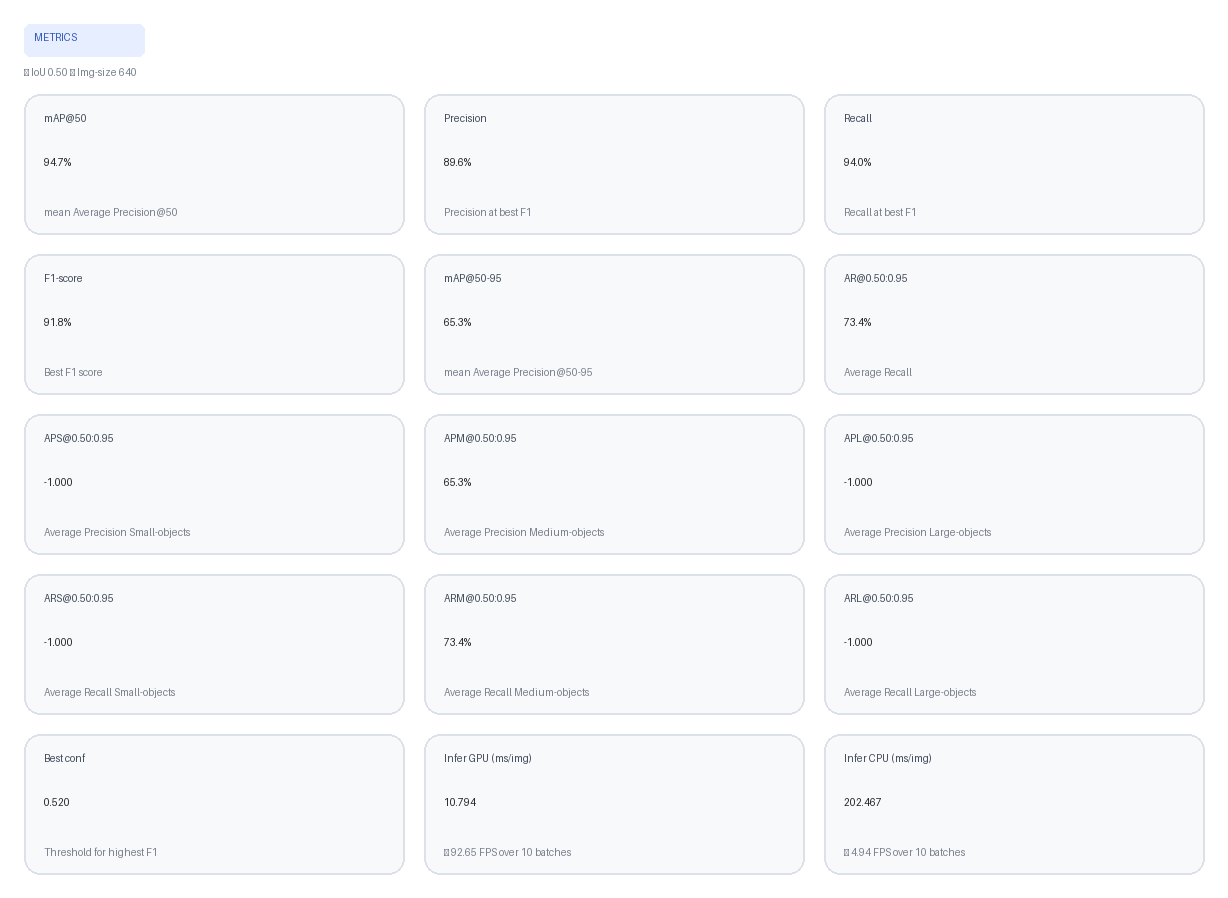

In [ ]:
import os
HOME = os.getcwd()
from IPython.display import display, Image
%cd {HOME}
Image(filename=f'{HOME}/runs/train/1/summary.png', width=600)

In [ ]:
!python tools/infer.py --weights runs/train/1/weights/best_model_state.pt --img_dir {dataset.location}/test/images

Unexpected keys (norm_head.num_batches_tracked, classifier.bias, classifier.weight, conv_head.weight, norm_head.bias, norm_head.running_mean, norm_head.running_var, norm_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
Unexpected keys (norm_head.num_batches_tracked, classifier.bias, classifier.weight, conv_head.weight, norm_head.bias, norm_head.running_mean, norm_head.running_var, norm_head.weight) found while loading pretrained weights. This may be expected if model is being adapted.
✓ Sparat: /content/YoloLite-Official-Repo/runs/infer/1/0b47311f426ff926578c9d738d683e76_jpg.rf.999ad103e4382fd86b69052c2c35b46e_pred.jpg
✓ Sparat: /content/YoloLite-Official-Repo/runs/infer/1/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.32fed1aaf288b7272871e0c8ca135522_pred.jpg
✓ Sparat: /content/YoloLite-Official-Repo/runs/infer/1/2f6fb003bb89cd401322a535acb42f65_jpg.rf.0665f91955a23922dc476e2cbc379510_pred.jpg
✓ Sparat: /content/YoloLite-Official-Repo/runs/

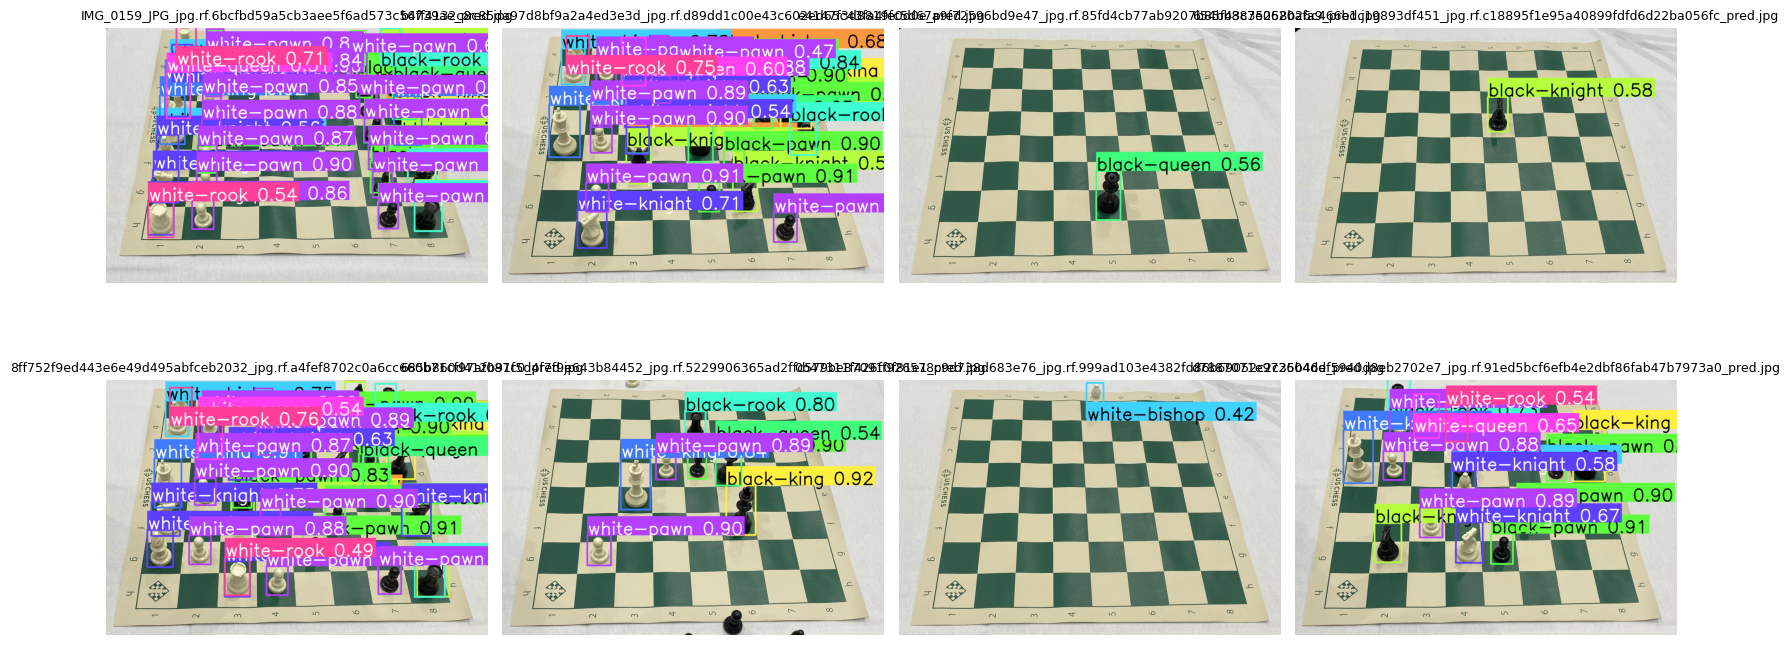

In [ ]:
#@title Show random images from infer
import random, os, glob
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMG_DIR = "runs/infer/1"
K = 8
RECURSIVE = False
SEED = 1337

# --- hämta filvägar ---
patterns = ["*.jpg", "*.jpeg", "*.png", "*.bmp", "*.tif", "*.tiff"]
files = []
for pat in patterns:
    if RECURSIVE:
        files += glob.glob(str(Path(IMG_DIR) / "**" / pat), recursive=True)
    else:
        files += glob.glob(str(Path(IMG_DIR) / pat))

if not files:
    raise SystemExit(f"No pictures found in: {IMG_DIR}")

random.seed(SEED)
sampled = random.sample(files, k=min(K, len(files)))

cols = min(4, len(sampled))
rows = (len(sampled) + cols - 1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
if rows == 1 and cols == 1:
    axes = [[axes]]
elif rows == 1:
    axes = [axes]
elif cols == 1:
    axes = [[ax] for ax in axes]

for ax, fp in zip([a for row in axes for a in row], sampled):
    img = mpimg.imread(fp)
    ax.imshow(img)
    ax.set_title(Path(fp).name, fontsize=9)
    ax.axis("off")


for ax in [a for row in axes for a in row][len(sampled):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


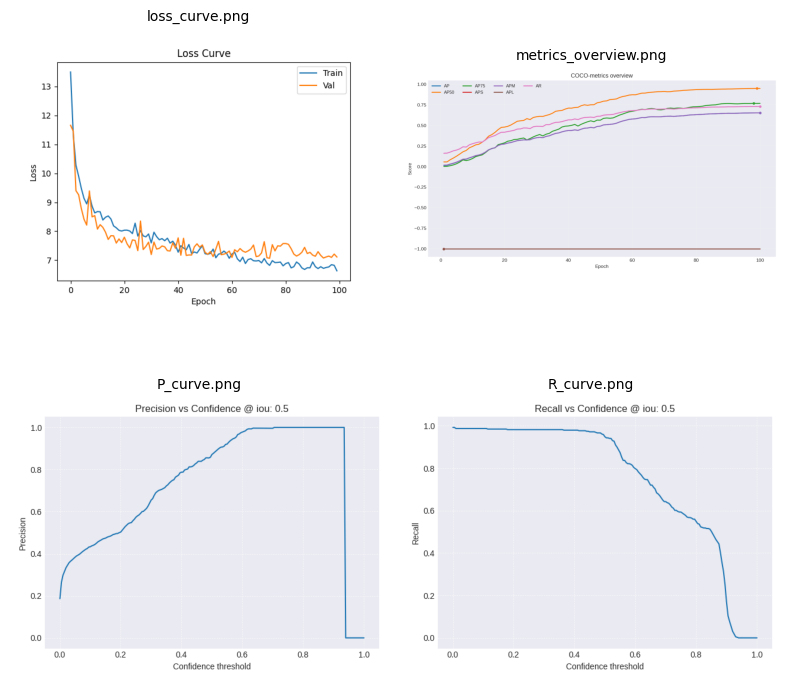

In [ ]:
#@title Training plots
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


FILES = [
    r"runs/train/1/loss_curve.png",
    r"runs/train/1/plots/metrics_overview.png",
    r"runs/train/1/P_curve.png",
    r"runs/train/1/R_curve.png",
]


# --- validering ---
assert len(FILES) == 4, f"Du angav {len(FILES)} filer – ange exakt 4."
for fp in FILES:
    if not Path(fp).exists():
        raise FileNotFoundError(fp)

# --- rita 2x2 ---
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()

for ax, fp in zip(axes, FILES):
    img = mpimg.imread(fp)
    ax.imshow(img)
    ax.set_title(Path(fp).name, fontsize=10)
    ax.axis("off")

plt.tight_layout()
plt.show()




# **Export to onnx**

Notice that the CPU timings is incorrect in the summary.png image, to get the correct timings download the weights and convert to onnx and then run onnx_infer.py

# ****Download the runs folder****

In [ ]:
import shutil
from google.colab import files


folder_to_zip = f"{HOME}/runs"
zip_ = f"{HOME}/runs"


shutil.make_archive(zip_, "zip", folder_to_zip)


files.download(zip_ + ".zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>